# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline
from sklearn.linear_model import LinearRegression

# 2. Loading and Cleaning with Pandas

In [174]:
df_train = pd.read_csv('train-data.csv')

In [175]:
df_train.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [176]:
df_test = pd.read_csv('test-data.csv')

In [177]:
df_test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [178]:
## checking missing value 
df_train.isna().sum()
df_test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [179]:
df_train = df_train.drop(['Unnamed: 0'], axis = 1)
df_test = df_test.drop(['Unnamed: 0'], axis = 1)
df_train.head()



Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [180]:
df_train.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [181]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [182]:
df_train = df_train.drop(['New_Price'],axis = 1)
df_test = df_test.drop(['New_Price'], axis = 1)
df_train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [183]:
                 
df_train = df_train.replace({
    'Mileage':'[A-Za-z./]',
    'Engine':'[A-Za-z]',
    'Power':'[A-Za-z.]'
    # it will remove character starting from A -Z and a -z character from runtime
}, '', regex = True)




In [184]:
df_test = df_test.replace({
    'Mileage':'[A-Za-z./]',
    'Engine':'[A-Za-z]',
    'Power':'[A-Za-z.]'
    # it will remove character starting from A -Z and a -z character from runtime
}, '', regex = True)


In [185]:
df_train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage Engine  Power  Seats  Price  
0       CNG       Manual      First    266    998   5816     5.0   1.75  
1    Diesel       Manual      First   1967   1582   1262     5.0  12.50  
2    Petrol       Manual      First    182   1199    887     5.0   4.50  
3    Diesel       Manual      First   2077   1248   8876     7.0   6.00  
4    Diesel    Automatic     Second    152   1968   1408     5.0  17.74

In [186]:
# converted into integer

df_train['Mileage'] = pd.to_numeric(df_train['Mileage'], errors = 'coerce')
df_train['Engine'] = pd.to_numeric(df_train['Engine'], errors = 'coerce')
df_train['Power'] = pd.to_numeric(df_train['Power'], errors = 'coerce')

In [187]:
df_test['Mileage'] = pd.to_numeric(df_test['Mileage'], errors = 'coerce')
df_test['Engine'] = pd.to_numeric(df_test['Engine'], errors = 'coerce')
df_test['Power'] = pd.to_numeric(df_test['Power'], errors = 'coerce')

In [188]:
## Filling NaN values with median  
df_train[['Mileage','Engine','Power','Seats']] =df_train[['Mileage','Engine','Power','Seats']].fillna(df_train[['Mileage','Engine','Power','Seats']].median())
df_train.head()


Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    266.0   998.0  5816.0    5.0   1.75  
1    Diesel       Manual      First   1967.0  1582.0  1262.0    5.0  12.50  
2    Petrol       Manual      First    182.0  1199.0   887.0    5.0   4.50  
3    Diesel       Manual      First   2077.0  1248.0  8876.0    7.0   6.00  
4    Diesel    Automatic     Second    152.0  1968.0  1408.0    5.0  17.74

In [189]:
df_train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# 3.  EDA and Visualization

In [190]:
df_train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  
0       CNG       Manual      First    266.0   998.0  5816.0    5.0   1.75  
1    Diesel       Manual      First   1967.0  1582.0  1262.0    5.0  12.50  
2    Petrol       Manual      First    182.0  1199.0   887.0    5.0   4.50  
3    Diesel       Manual      First   2077.0  1248.0  8876.0    7.0   6.00  
4    Diesel    Automatic     Second    152.0  1968.0  1408.0    5.0  17.74

In [191]:
df_test.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              40929       CNG       Manual      First     3226   998.0   
1              54493    Petrol       Manual     Second      247   796.0   
2              34000    Diesel       Manual      First     1368  2393.0   
3             139000    Diesel       Manual      First     2359  1364.0   
4              29000    Petrol       Manual      First      185  1197.0   

    Power  Seats  
0   582.0    4.0  
1   473.0    5.0  
2  1478.0    7.0  
3     NaN    5.0  
4  8285.0    5.0

<AxesSubplot:>

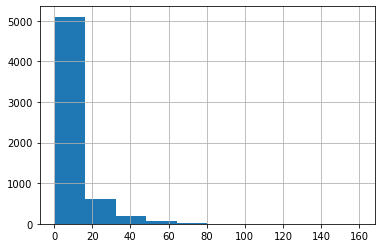

In [192]:
df_train['Price'].hist()

(array([  33.,  160.,  584., 1619., 1804.,  835.,  550.,  340.,   87.,
           7.]),
 array([-0.82098055, -0.23136512,  0.35825032,  0.94786576,  1.53748119,
         2.12709663,  2.71671207,  3.30632751,  3.89594294,  4.48555838,
         5.07517382]),
 <BarContainer object of 10 artists>)

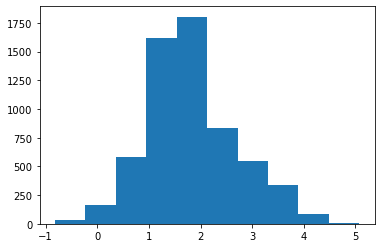

In [193]:
plt.hist(np.log(df_train['Price']))

<AxesSubplot:>

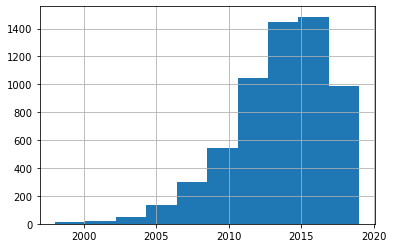

In [194]:
df_train["Year"].hist()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


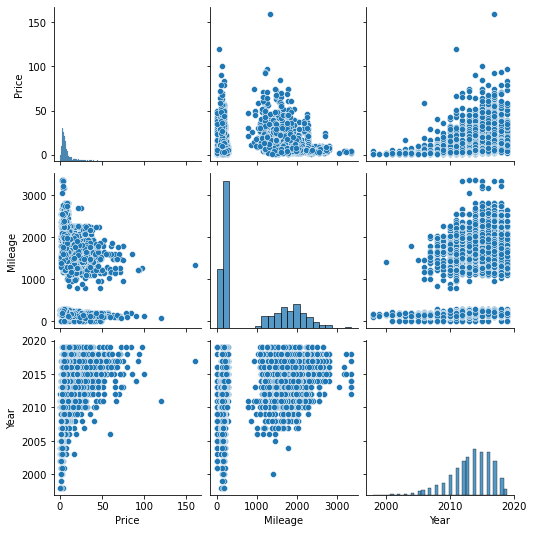

In [195]:
#Scatter plot for numerical features
num_features = ["Price", "Mileage", "Year"]
sns.pairplot(df_train[num_features], size = 2.5)
plt.show();

# 4. Feature Engineering 

In [196]:
# removing outliers in fuel type
df_train = df_train[df_train['Fuel_Type']!= 'Electric']
df_train.shape

(6017, 12)

In [197]:
print(df_train.Kilometers_Driven.min())
print(df_train.Kilometers_Driven.max())

171
6500000


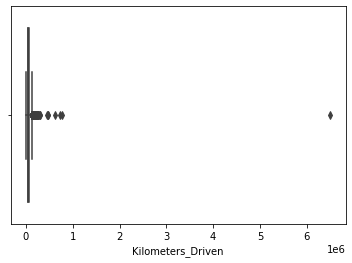

In [198]:


## Ploting boxplot to check outliers
sns.boxplot(x=df_train['Kilometers_Driven'])
plt.show()

In [199]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df_train.Kilometers_Driven.quantile(0.25)
Q3 = df_train.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [200]:
## checking outlier
df_train[(df_train.Kilometers_Driven < lowerlimit)  | (df_train.Kilometers_Driven > upperlimit)]

Name    Location  Year  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
64                        Tata Indica V2 eLS     Chennai  2016   
77                      Toyota Innova 2.0 G1     Chennai  2006   
154      Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012   
164        Ford Ecosport 1.5 DV5 MT Ambiente       Kochi  2014   
...                                      ...         ...   ...   
5852    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai  2008   
5871  Ford Endeavour 4x2 XLT Limited Edition        Pune  2009   
5914          Skoda Octavia Elegance 1.9 TDI   Hyderabad  2003   
5953                    Ford Figo Diesel EXI      Jaipur  2012   
5957                      Honda City 1.5 EXI  Coimbatore  2004   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
29               262000    Diesel       Manual  Fourth & Above    128.0   
64               178000    Diesel       Manual           First    250.0   
77               230000    Petrol       Manual           Third    124.0   
154              136997    Diesel    Automatic           First    172.0   
164              147898    Diesel       Manual           First    227.0   
...                 ...       ...          ...             ...      ...   
5852             192000    Diesel       Manual           First    128.0   
5871             180000    Diesel       Manual           First    109.0   
5914             132000    Diesel       Manual           First    187.0   
5953             140000    Diesel       Manual           First    200.0   
5957             186679    Petrol       Manual          Second    130.0   

      Engine   Power  Seats  Price  
29    2494.0   102.0    7.0   4.00  
64    1396.0    69.0    5.0   2.50  
77    1998.0   132.0    8.0   4.50  
154   1968.0  1381.0    5.0   8.50  
164   1498.0  8984.0    5.0   4.42  
...      ...     ...    ...    ...  
5852  2494.0   102.0    8.0   6.85  
5871  2499.0   143.0    7.0   7.50  
5914  1896.0    66.0    5.0   2.25  
5953  1399.0    68.0    5.0   2.51  
5957  1493.0   100.0    5.0   1.76  

[202 rows x 12 columns]

In [201]:
## Drop all the rows containing height beyond lower and upper limit.
df_train = df_train[(df_train.Kilometers_Driven > lowerlimit) & (df_train.Kilometers_Driven < upperlimit)]
df_train.shape

(5815, 12)

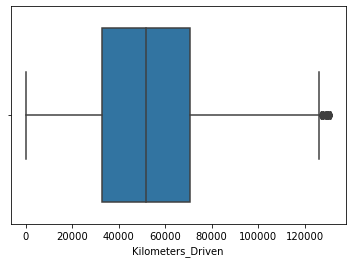

In [202]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df_train['Kilometers_Driven'])
plt.show()

In [203]:
## Modifying car names to group by brand
df_train.Name = df_train.Name.str.split().str.get(0)
df_test.Name = df_test.Name.str.split().str.get(0)

In [204]:
df_train.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage  Engine   Power  Seats  Price  
0      First    266.0   998.0  5816.0    5.0   1.75  
1      First   1967.0  1582.0  1262.0    5.0  12.50  
2      First    182.0  1199.0   887.0    5.0   4.50  
3      First   2077.0  1248.0  8876.0    7.0   6.00  
4     Second    152.0  1968.0  1408.0    5.0  17.74

In [205]:
df_train.Name.value_counts()

Maruti           1187
Hyundai          1087
Honda             599
Toyota            344
Mercedes-Benz     316
Volkswagen        310
Ford              285
BMW               262
Mahindra          259
Audi              235
Tata              170
Skoda             166
Renault           141
Chevrolet         117
Nissan             88
Land               59
Jaguar             40
Mini               26
Fiat               25
Mitsubishi         23
Volvo              20
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Smart               1
Ambassador          1
Isuzu               1
Lamborghini         1
Name: Name, dtype: int64

In [206]:
## Removing outliers in car brands
df_train = df_train[df_train['Name'] != 'Force']
df_train = df_train[df_train['Name'] != 'ISUZU']
df_train = df_train[df_train['Name'] != 'Bentley']
df_train = df_train[df_train['Name'] != 'Lamborghini']
df_train = df_train[df_train['Name'] != 'Isuzu']
df_train = df_train[df_train['Name'] != 'Smart']
df_train = df_train[df_train['Name'] != 'Ambassador']
df_train.shape

(5805, 12)

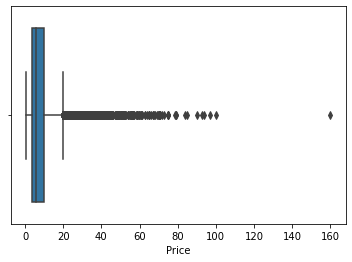

In [207]:

## Ploting boxplot to check outliers
sns.boxplot(x=df_train['Price'])
plt.show()

In [208]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df_train.Price.quantile(0.25)
Q3 = df_train.Price.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [209]:
## checking outlier
df_train[(df_train.Price < lowerlimit)  | (df_train.Price > upperlimit)]

Name   Location  Year  Kilometers_Driven Fuel_Type  \
13             Land      Delhi  2014              72000    Diesel   
19    Mercedes-Benz  Bangalore  2014              78500    Diesel   
22             Audi     Mumbai  2015              55985    Petrol   
38    Mercedes-Benz       Pune  2013              85000    Diesel   
50             Audi      Kochi  2015              13648    Diesel   
...             ...        ...   ...                ...       ...   
5946            BMW  Bangalore  2016              16000    Diesel   
5950           Audi  Bangalore  2014              65630    Diesel   
5970  Mercedes-Benz      Kochi  2018              17773    Petrol   
5996         Jaguar      Kochi  2016              31150    Diesel   
6008        Porsche  Hyderabad  2013              40000    Diesel   

     Transmission Owner_Type  Mileage  Engine    Power  Seats  Price  
13      Automatic      First    127.0  2179.0   1877.0    5.0  27.00  
19      Automatic      First   1484.0  2143.0  16762.0    5.0  28.00  
22      Automatic      First   1353.0  1984.0  17701.0    5.0  23.50  
38      Automatic      First   1174.0  2987.0   2548.0    5.0  28.00  
50      Automatic      First   1711.0  1968.0  17433.0    5.0  21.43  
...           ...        ...      ...     ...      ...    ...    ...  
5946    Automatic      First   1469.0  2993.0    258.0    5.0  48.00  
5950    Automatic      First   1573.0  1968.0  17433.0    5.0  21.75  
5970    Automatic      First    137.0  1991.0    183.0    5.0  26.76  
5996    Automatic      First   1636.0  2179.0   1877.0    5.0  30.54  
6008    Automatic     Second   1785.0  2967.0    300.0    4.0  45.00  

[707 rows x 12 columns]

In [210]:
## Drop all the rows containing height beyond lower and upper limit.
df_train = df_train[(df_train.Price > lowerlimit) & (df_train.Price < upperlimit)]
df_train.shape

(5094, 12)

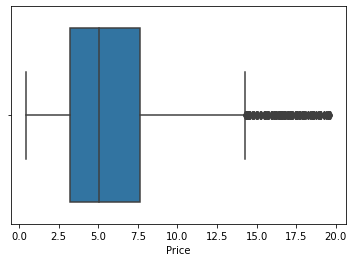

In [211]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df_train['Price'])
plt.show()

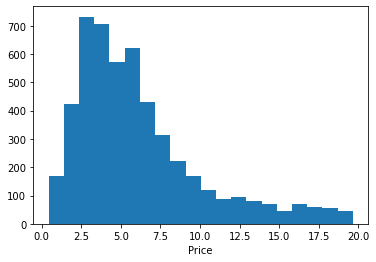

In [212]:
plt.hist(df_train.Price,bins=20)
plt.xlabel("Price")
plt.show()

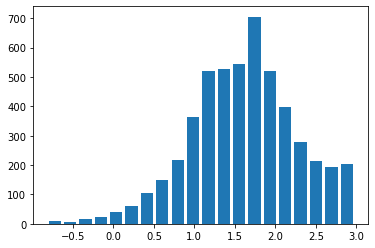

In [213]:
# Apply log transformation
x = np.log(df_train['Price'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

In [214]:
## Calculating age of the car from Year
df_train['Car_age'] = 2022 - df_train['Year']
df_test['Car_age'] = 2022 - df_test['Year']
df_train.head()

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti      Mumbai  2010              72000       CNG       Manual   
1  Hyundai        Pune  2015              41000    Diesel       Manual   
2    Honda     Chennai  2011              46000    Petrol       Manual   
3   Maruti     Chennai  2012              87000    Diesel       Manual   
4     Audi  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage  Engine   Power  Seats  Price  Car_age  
0      First    266.0   998.0  5816.0    5.0   1.75       12  
1      First   1967.0  1582.0  1262.0    5.0  12.50        7  
2      First    182.0  1199.0   887.0    5.0   4.50       11  
3      First   2077.0  1248.0  8876.0    7.0   6.00       10  
4     Second    152.0  1968.0  1408.0    5.0  17.74        9

In [218]:
## Applying Log to the Price to normalise it
df_train.Price = np.log1p(df_train.Price)
df_train.Price

0       0.698931
1       1.281681
2       0.995009
3       1.080418
4       1.368807
          ...   
6014    1.011310
6015    0.959135
6016    0.859075
6017    0.830614
6018    0.812157
Name: Price, Length: 5094, dtype: float64

In [219]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [220]:
df_train['Name'] = label_encoder.fit_transform(df_train['Name'])
df_train['Location'] = label_encoder.fit_transform(df_train['Location'])
df_train['Fuel_Type'] = label_encoder.fit_transform(df_train['Fuel_Type'])
df_train['Transmission'] = label_encoder.fit_transform(df_train['Transmission'])
df_train['Owner_Type'] = label_encoder.fit_transform(df_train['Owner_Type'])


In [221]:
df_test['Name'] = label_encoder.fit_transform(df_test['Name'])
df_test['Location'] = label_encoder.fit_transform(df_test['Location'])
df_test['Fuel_Type'] = label_encoder.fit_transform(df_test['Fuel_Type'])
df_test['Transmission'] = label_encoder.fit_transform(df_test['Transmission'])
df_test['Owner_Type'] = label_encoder.fit_transform(df_test['Owner_Type'])


In [222]:
df_train.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0    12         9  2010              72000          0             1   
1     7        10  2015              41000          1             1   
2     6         2  2011              46000          3             1   
3    12         2  2012              87000          1             1   
4     0         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats     Price  Car_age  
0           0    266.0   998.0  5816.0    5.0  0.698931       12  
1           0   1967.0  1582.0  1262.0    5.0  1.281681        7  
2           0    182.0  1199.0   887.0    5.0  0.995009       11  
3           0   2077.0  1248.0  8876.0    7.0  1.080418       10  
4           2    152.0  1968.0  1408.0    5.0  1.368807        9

In [223]:
## Dealing with missing values 
df_train.isnull().sum() 

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_age              0
dtype: int64

In [224]:
df_train.dtypes

Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Car_age                int64
dtype: object

# 5. Training Model

In [160]:
y = df_train.Price
x = df_train.drop(['Price'], axis = 1)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)

In [162]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

# 6. Prediction

In [163]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([1.12959171, 1.30745426, 2.16871904, ..., 1.95156629, 1.67139042,
       1.69153111])

In [164]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 0.19203821737198704
Mean Squared Error: 0.06494890457511152
Root Mean Squared Error: 0.25485074960672865
R2 score : 0.781937


# 7. Evaluating your Model

In [165]:
Y_train_predicted = model1.predict(X_train)
Y_test_predicted = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.7710933057324503
Test set accuracy :  0.7819367566725637


In [225]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
1284      1.095273         1.129592
5023      1.249902         1.307454
5613      2.944439         2.168719
5799      2.397895         2.242184
2337      1.435085         1.468326
1523      1.864080         1.705086
3957      1.403643         1.498133
4         2.930660         2.464046
4681      1.223775         1.072346
5629      2.277267         1.969733

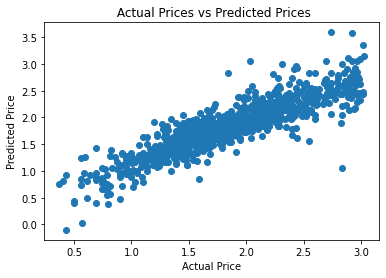

In [226]:
plt.scatter(y_valid, Y_test_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# SUBMISSION DATE: 2nd April 2022